In [1]:
# step 1= importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# supress warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\lenovo'

In [3]:
#  step 2= loading the dataset
ad_data = pd.read_csv("advertising.csv")
ad_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
ad_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


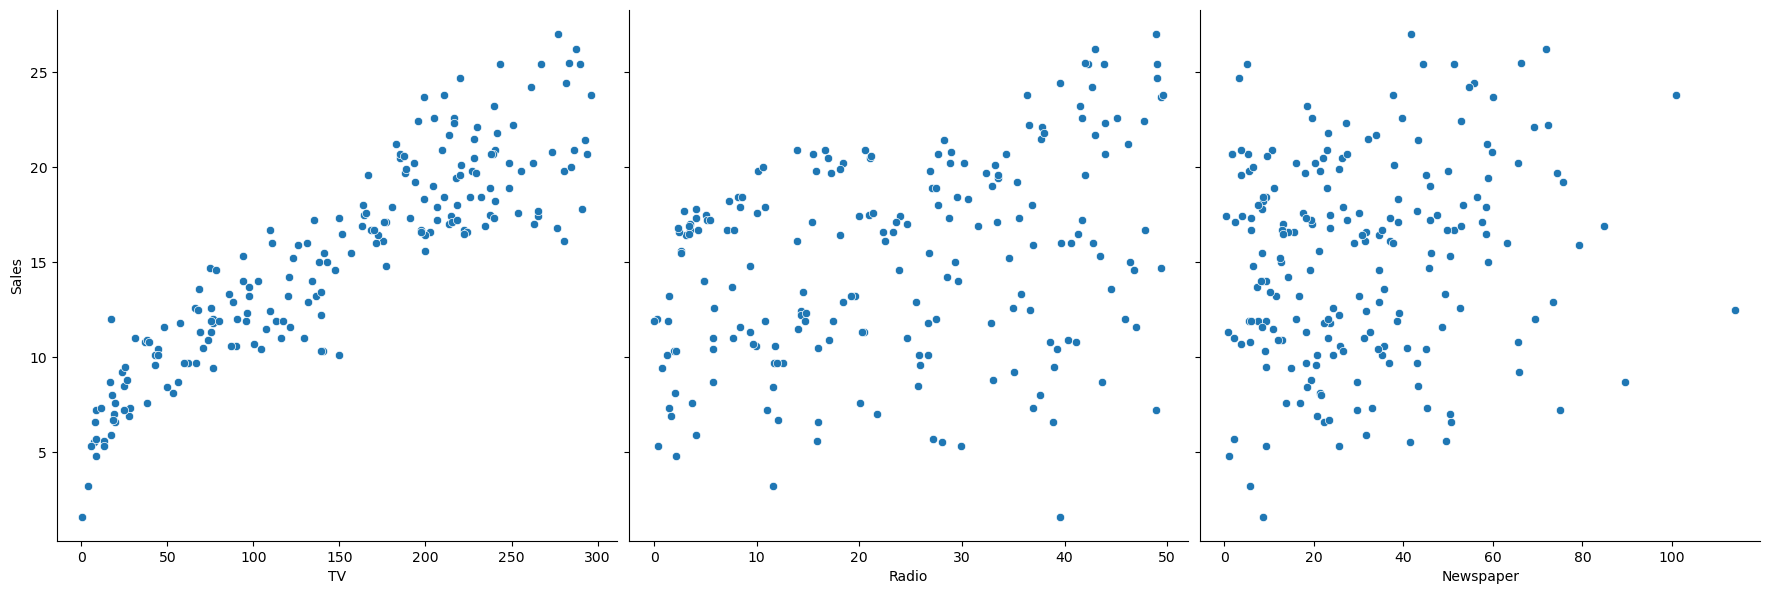

In [5]:
# step-3 = visualization
#to plot all scatterplots in a single plot
sns.pairplot(ad_data, x_vars=['TV','Radio','Newspaper',], y_vars='Sales', size=6, kind='scatter')
plt.show()

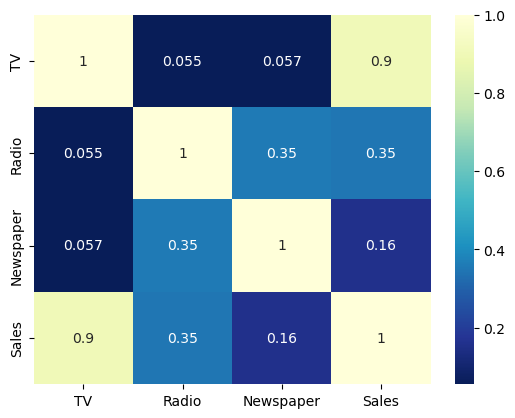

In [6]:
# plotting heatmap to find out correlations
sns.heatmap(ad_data.corr(), cmap='YlGnBu_r',annot=True)
plt.show()

In [17]:
# step4- performing simple linear regression
from sklearn.model_selection import train_test_split
x = ad_data['TV']
y = ad_data['Sales']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [20]:
import statsmodels.api as sm

In [23]:
# add a constant to get an intercept
x_train_sm=sm.add_constant(x_train)

In [24]:
# fit the regression line using 'OLS'
lr=sm.OLS(y_train, x_train_sm).fit()

In [27]:
# print the parameters, i.e, intercept and slope of the regression line obtained
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [28]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.52e-52
Time:                        15:33:39   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [29]:
# step-5 = performining predictions on the test set
# add a constant to x_test
x_test_sm = sm.add_constant(x_test)

In [30]:
# predict the y values corresponding to x_test_sm
y_pred = lr.predict(x_test_sm)

In [31]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [32]:
#importing libraries 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#RMSE value
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

#R-squared value
print("R-squared: ",r2_score(y_test, y_pred))

RMSE:  2.019296008966232
R-squared:  0.7921031601245659
